# 部分采样

- [索引](#index)
- [切片](#split)
    - [二维切片](#2d_split)
    - 三维切片
        - [手写数字例子](#mnist)
        - [Lena](#lena)
- 数据提取
    - [gather()](#gather)
    - [gather_nd()](#gather_nd)

#### <span id='index'>1. 索引</span>

![6'3-索引.png](./img/6'3-索引.png)

#### <span id='split'>2.切片</span>

tensor[ start : end : step=1 ]

- 切片是一个左闭右开的区间
- end 可以省略
- step=1，可以省略

In [2]:
import tensorflow as tf

*一维张量*

In [3]:
a = tf.range(10)

In [4]:
# 取出所有
a[::]

<tf.Tensor: id=7, shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])>

In [5]:
# 步长=2，取出偶数
a[::2]

<tf.Tensor: id=11, shape=(5,), dtype=int32, numpy=array([0, 2, 4, 6, 8])>

In [6]:
# 逆序
a[::-1]

<tf.Tensor: id=15, shape=(10,), dtype=int32, numpy=array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])>

<span id='2d_split'>*二维张量*</span>

In [7]:
TRAIN_URL = 'http://download.tensorflow.org/adata/iris_training.csv'
train_path = tf.keras.utils.get_file(TRAIN_URL.split('/')[-1], TRAIN_URL)

In [8]:
import pandas as pd
df_iris = pd.read_csv(train_path)

In [9]:
import numpy as np
np_iris = np.array(df_iris)

In [10]:
iris = tf.convert_to_tensor(np_iris)
iris.shape

TensorShape([120, 5])

In [11]:
# 读取第一个样本中的所有数据，包括属性和类别
iris[0,:]

<tf.Tensor: id=20, shape=(5,), dtype=float64, numpy=array([6.4, 2.8, 5.6, 2.2, 2. ])>

In [12]:
# 读取前5个样本的属性
iris[0:5, 0:4]

<tf.Tensor: id=24, shape=(5, 4), dtype=float64, numpy=
array([[6.4, 2.8, 5.6, 2.2],
       [5. , 2.3, 3.3, 1. ],
       [4.9, 2.5, 4.5, 1.7],
       [4.9, 3.1, 1.5, 0.1],
       [5.7, 3.8, 1.7, 0.3]])>

*三维张量*

- <span id ='mnist'>手写数字数据集MNIST</span>

In [13]:
mnist = tf.keras.datasets.mnist
(mnist,_),(_,_) = mnist.load_data()

In [14]:
mnist.shape

(60000, 28, 28)

In [15]:
import matplotlib.pyplot as plt

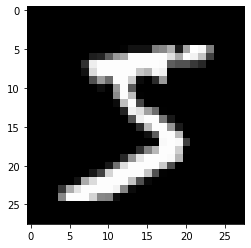

In [16]:
# mnist[0,::,::] 第一张图片
plt.imshow(mnist[0,::,::],cmap='gray')

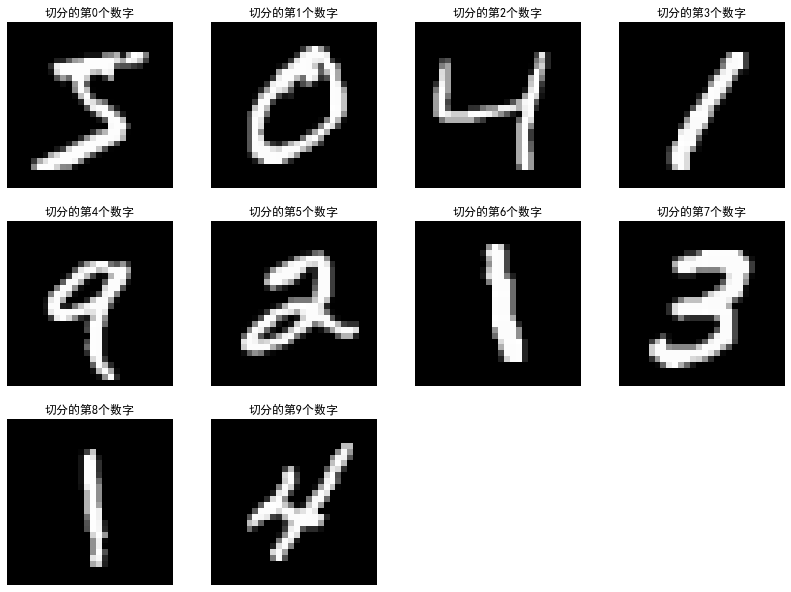

In [17]:
# 前10张图片
pre_10_img = mnist[0:10,::,::]

plt.figure(figsize=(14,14))
plt.rcParams['font.family'] = 'SimHei'

for i in range(10):
    plt.subplot(4,4,i+1)
    plt.axis('off')
    img = pre_10_img[i]
    plt.imshow(img, cmap='gray')
    plt.title(f"切分的第{i}个数字")

In [18]:
# 前20张图片的所有的行，隔行采样
pre_20_partition_row = mnist[0:20, 0:28:2,:]
pre_20_partition_row.shape

(20, 14, 28)

In [19]:
# 所有的行与列都隔行采样
partition_row_column = mnist[:, 0:28:2,0:28:2]
partition_row_column.shape

(60000, 14, 14)

- <span id ='lena'>三维彩色图片lena</span>

In [20]:
# 三维彩色图片lena
from PIL import Image

img = Image.open('./lena.tiff')

In [21]:
lena = tf.convert_to_tensor(np.array(img))
lena.shape

TensorShape([512, 512, 3])

In [22]:
lena[0]

<tf.Tensor: id=29, shape=(512, 3), dtype=uint8, numpy=
array([[226, 137, 125],
       [226, 137, 125],
       [223, 137, 133],
       ...,
       [230, 148, 122],
       [221, 130, 110],
       [200,  99,  90]], dtype=uint8)>

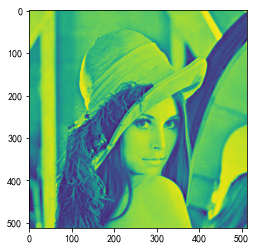

In [23]:
# 只选择R通道
plt.imshow(lena[:,:,0])

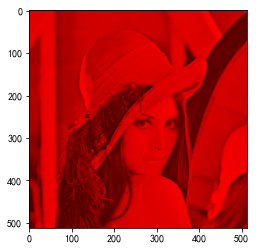

In [24]:
r = lena[:,:,0]

# 堆叠图片 => R
r = tf.stack((r, tf.zeros(r.shape,dtype='uint8'),tf.zeros(r.shape,dtype='uint8')),axis=2)
plt.imshow(r)

In [25]:
sa0 = tf.stack((r, tf.zeros(r.shape,dtype='uint8')),axis=0)
sa0.shape

TensorShape([2, 512, 512, 3])

In [26]:
sa1 = tf.stack((r, tf.zeros(r.shape,dtype='uint8')),axis=1)
sa1.shape

TensorShape([512, 2, 512, 3])

In [27]:
sa2 = tf.stack((r, tf.zeros(r.shape,dtype='uint8')),axis=2)
sa2.shape

TensorShape([512, 512, 2, 3])

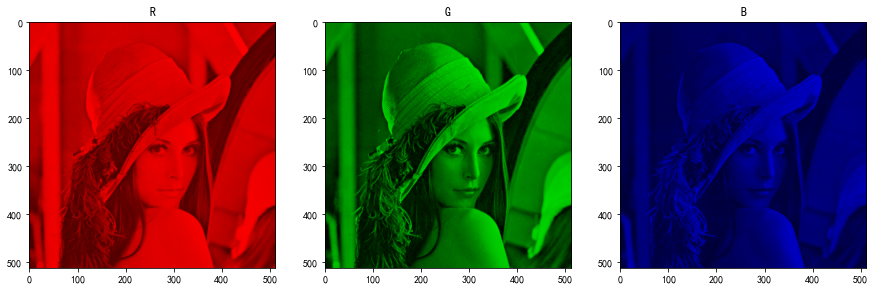

In [34]:
plt.figure(figsize=(15,5))
name = ['R','G','B']


plt.subplot(1,3,1)
r = lena[:,:,0]
_r = tf.stack((r,tf.zeros(r.shape,'uint8'),tf.zeros(r.shape,'uint8')),axis=2)
plt.title(name[0])
plt.imshow(_r)

plt.subplot(1,3,2)
g = lena[:,:,1]
_g = tf.stack((tf.zeros(g.shape,'uint8'),g,tf.zeros(g.shape,'uint8')),axis=2)
plt.title(name[1])
plt.imshow(_g)

plt.subplot(1,3,3)
b = lena[:,:,2]
_b = tf.stack((tf.zeros(b.shape,'uint8'),tf.zeros(b.shape,'uint8'),b),axis=2)
plt.title(name[2])
plt.imshow(_b)

#### <span id='gather'>3.数据提取</span>
gather(params, axis, indices)

用一个 *索引列表* ，将 *给定张量* 中的对应索引值的元素提取出来。

In [39]:
a = tf.range(5)
tf.gather(a,indices=[0,2,3])

<tf.Tensor: id=186, shape=(3,), dtype=int32, numpy=array([0, 2, 3])>

In [45]:
# 多维采样
b = tf.range(20)
b = tf.reshape(b, [4, 5])
b

<tf.Tensor: id=214, shape=(4, 5), dtype=int32, numpy=
array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])>

In [43]:
tf.gather(b, axis=0, indices=[0,2])

<tf.Tensor: id=205, shape=(2, 5), dtype=int32, numpy=
array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14]])>

In [44]:
tf.gather(b, axis=1, indices=[0,2,4])

<tf.Tensor: id=208, shape=(4, 3), dtype=int32, numpy=
array([[ 0,  2,  4],
       [ 5,  7,  9],
       [10, 12, 14],
       [15, 17, 19]])>

<span id='gather_nd'>gather_nd()</span>

定点采样

In [46]:
tf.gather_nd(b, [[0,0],[1,1],[2,2]])

<tf.Tensor: id=216, shape=(3,), dtype=int32, numpy=array([ 0,  6, 12])>

In [48]:
b[0,0]

<tf.Tensor: id=220, shape=(), dtype=int32, numpy=0>